# Iris Flower Classification

This notebook demonstrates a basic classification task using the famous Iris dataset. The objective is to train a machine learning model that can classify the species of an Iris flower (Setosa, Versicolor, or Virginica) based on its physical measurements (sepal and petal length/width).

We will use:
- Scikit-learn for model training and evaluation
- Seaborn and Matplotlib for data visualization
- Decision Tree Classifier as our model

## Importing Required Libraries

We begin by importing the necessary Python libraries for data manipulation, visualization, and machine learning.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading the Dataset

We load the Iris dataset from a CSV file and display the first few rows to understand its structure.


In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
print(df.head()) 

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## Data Preprocessing

Before training our model, we:
- Drop the `Id` column since it's not useful for prediction.
- Separate features (`X`) and target (`y`).
- Encode the target labels using `LabelEncoder` so they can be used in classification.

In [4]:
df = df.drop(columns=["Id"])

In [5]:
X = df.drop(columns=["Species"])
y = df["Species"]

In [6]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Splitting the Dataset

We split the dataset into training and testing sets using an 70/30 split. This allows us to evaluate model performance on unseen data.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)


## Model Training

We train a Decision Tree Classifier on the training data. Decision trees are simple yet powerful models that can capture non-linear relationships.


In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test)

## Model Evaluation

We evaluate the trained model using:
- Accuracy score
- Classification report (precision, recall, F1-score)

These metrics help us understand how well our model performs across all three Iris species.


In [10]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)


In [11]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


Accuracy: 100.00%
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



## Visualizing the Data

We use Seaborn's pairplot to explore relationships between features. This can give insights into how separable the classes are.

We also display a confusion matrix to visually assess classification performance.


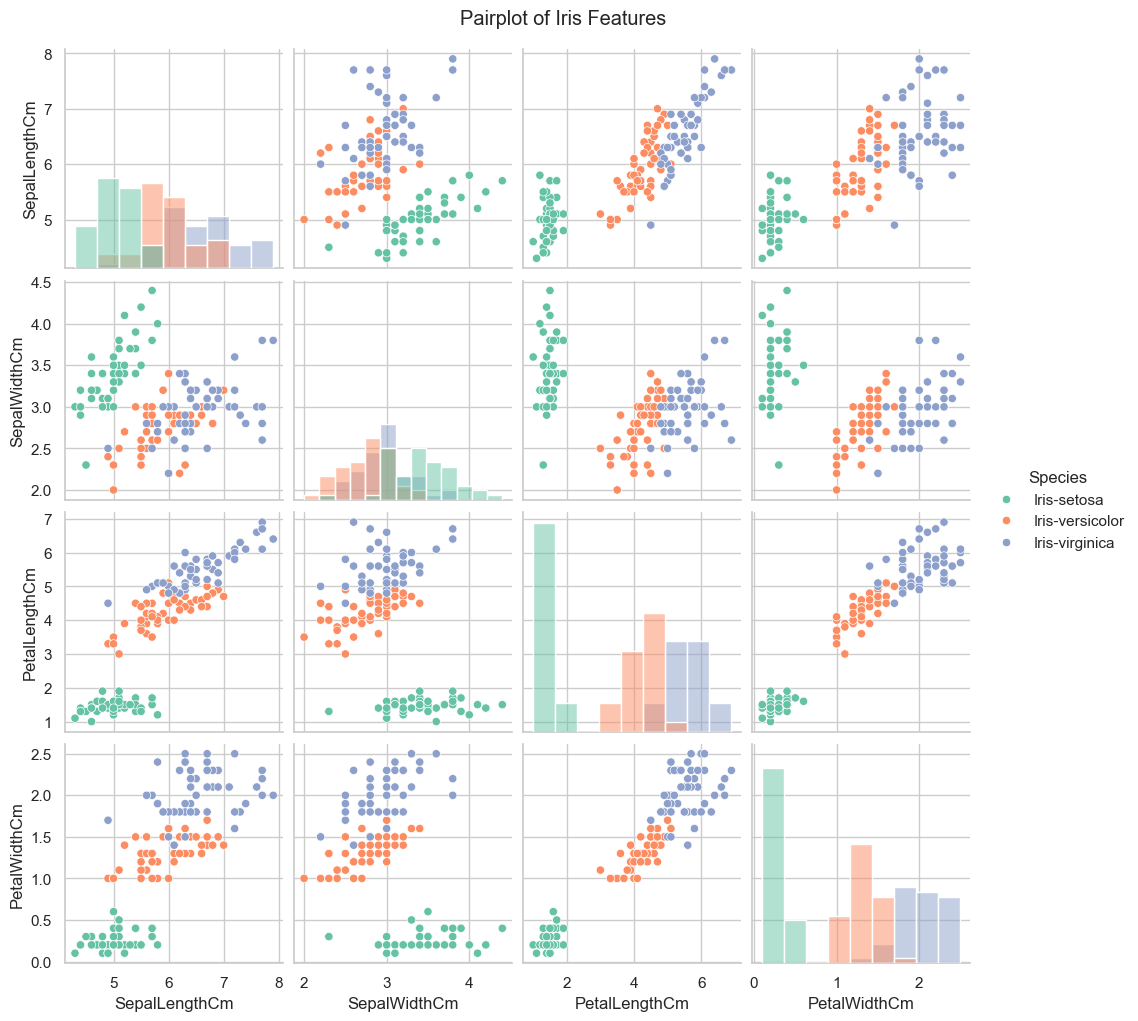

In [12]:
sns.set(style="whitegrid")
sns.pairplot(df, hue="Species", diag_kind="hist", palette="Set2")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

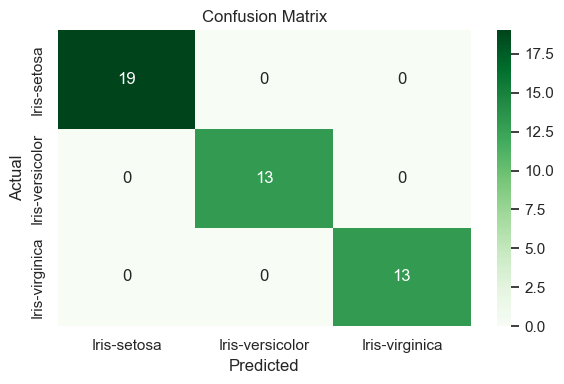

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Conclusion

Our Decision Tree model achieved a strong classification performance on the Iris dataset. This project demonstrates the end-to-end process of:
- Loading and preparing data
- Training a model
- Evaluating performance
- Visualizing results

Future work could include experimenting with other classifiers (like SVM or Random Forest), performing cross-validation, and tuning hyperparameters for improved accuracy.
